In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')


In [3]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.isnull().sum() # to see missing values = True and isnull = NaN and sum() to count them

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [13]:
df.shape

(182, 15)

In [18]:
df.dropna().shape  # to drop all the rows with missing values

(182, 15)

## Imputation 
Mean Value Imputation

In [22]:
df["age_mean"] = df["age"].fillna(df["age"].mean())

In [24]:
df[["age_mean", "age"]]

,age_mean,age
1,38.0,38.0
3,35.0,35.0
6,54.0,54.0
10,4.0,4.0
11,58.0,58.0
...,...,...
871,47.0,47.0
872,33.0,33.0
879,56.0,56.0
887,19.0,19.0


In [ ]:
#Median = for skewed data
df["age_median"] = df["age"].fillna(df["age"].median())

In [29]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean


In [32]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [33]:
df['embarked_mode'] = df['embarked'].fillna(mode_value)

In [34]:
df[['embarked', 'embarked_mode']]

,embarked,embarked_mode
1,C,C
3,S,S
6,S,S
10,S,S
11,S,S
...,...,...
871,S,S
872,S,S
879,C,C
887,S,S


In [1]:
import pandas as pd
import numpy as np


#create a random seed
np.random.seed(42)

n_sample = 1000
class_0_ratio = 0.9
n_class_0 = int(n_sample * class_0_ratio)
n_class_1 = n_sample - n_class_0


In [2]:
n_class_0 , n_class_1


(900, 100)

In [3]:
class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0.0, scale=1
, size=n_class_0),
    'feature_2' : np.random.normal(loc=5.0, scale=2
, size=n_class_0),
    'target' : np.zeros(n_class_0)
})
class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=3.0, scale=1
, size=n_class_1),
    'feature_2' : np.random.normal(loc=8.0, scale=2
, size=n_class_1),
    'target' : np.ones(n_class_1)
})


In [4]:
df= pd.concat([class_0, class_1], axis=0).reset_index(drop=True)

In [5]:
df.head()

,feature_1,feature_2,target
0,0.496714,5.737347,0.0
1,-0.138264,4.213322,0.0
2,0.647689,5.057490,0.0
3,1.523030,7.556904,0.0
4,-0.234153,5.382198,0.0


In [8]:
# Minimum value , Maximum value , median , Q1  , Q3 , IQR
#Box plot and five number summary 
import numpy as np
marks = [45, 32, 56, 75, 89, 54, 32, 89, 90, 87, 67, 54, 45, 98, 99, 67, 74]
five_number_summary = np.quantile(marks, [0, 0.25, 0.5, 0.75, 1.0])

In [9]:
iqr = five_number_summary[3] - five_number_summary[1]
print(iqr)  # Output: 35

35.0


In [10]:
lower_fence = five_number_summary[1] - 1.5 * iqr
higher_fence = five_number_summary[3] + 1.5 * iqr
print(lower_fence, higher_fence)

1.5 141.5


<Axes: >

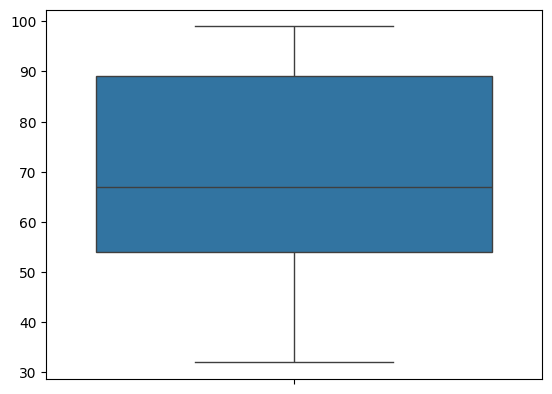

In [11]:
import seaborn as sns
sns.boxplot(marks)

<Axes: >

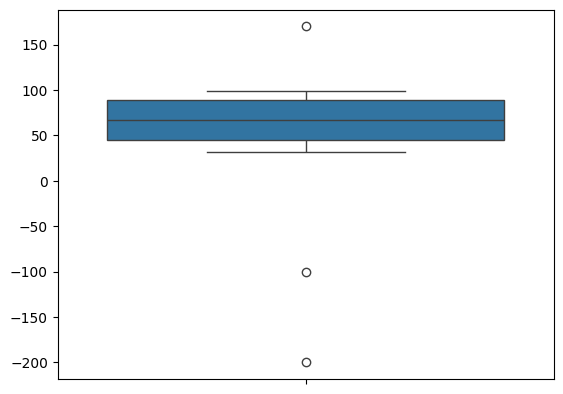

In [12]:
marks_with_outliers = marks + [-100, -200, 170]
sns.boxplot(marks_with_outliers)